# Set up

In [1]:
# Let us install timing extensions
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

### Dependencies: 
graph_tool, networkx, spot, toytree, toyplot, cvxopt, skunk

In [2]:
from src.workspace import *
from src.high_level_monitor import *
from src.low_level_monitor import *
from src.predictive_intent_tree import *
from src.buchi import *
from src.himo import *
from src.buchi_with_AP import *

import numpy as np
import skunk
import graph_tool.all as gt
import time
import matplotlib as mpl 
# mpl.use('cairo') 
import matplotlib.pyplot as plt
import scipy.optimize as sp
from collections import deque 
import toytree
import toyplot
import networkx as nx


(ipykernel_launcher.py:44476): Gtk-WARNING **: 13:02:05.200: Locale not supported by C library.
	Using the fallback 'C' locale.


time: 4.68 s


### Map setting
- In this version, MAP_SIZE 'x' and 'y' should be the same.
- Starting position (0,0) is the left bottom of the map.

In [3]:
NUM_REGIONS = 7
MAP_SIZE, start_position = {'x': 10, 'y': 10}, (0, 0)

time: 481 µs


### Workspace
- Regions are randomly generated.

In [4]:
ws = Workspace(MAP_SIZE, NUM_REGIONS, start_position)
# ------------------------------------------------------------------
# Useful vars
#     ws.region: coordinates of regions
#     ws.region_idx: cell indices of regions
# ------------------------------------------------------------------

time: 5.67 ms


- Or the user can manually define regions: **Workspace(MAP_SIZE, NUM_REGIONS, start_position, region = [(a, b), (c, d), ...])**

In [5]:
# # region = [(4, 1), (4, 3)]
# # region = [(1, 4), (4, 4), (4, 0)]
# region = [(1, 2), (5, 9), (8, 9)]
region = [(1, 6), (2, 9), (5, 6), (8, 3), (9, 8)]
NUM_REGIONS = len(region)
ws = Workspace(MAP_SIZE, NUM_REGIONS, start_position, region = region)

time: 4.54 ms


### Hypothetical missions
- LTL formulas for 'patrol', 'avoid', and 'patrol_while_avoid' missions can be automatically generated using region indices in each list. For example, if **['patrol', 0, 1]** is given to the monitor, **G (F p0 & F p1)** will be added to the intent set.

In [6]:
patrol = ['patrol', 0, 1]
sequenced_patrol = ['seq_patrol', 1, 0]
ordered_patrol = ['ord_patrol', 1, 0]
avoid = ['avoid', 2]
patrol_while_avoid = ['patrol_while_avoid', patrol, avoid]
sequenced_patrol_while_avoid = ['seq_patrol_while_avoid', sequenced_patrol, avoid]
ordered_patrol_while_avoid = ['ord_patrol_while_avoid', ordered_patrol, avoid]

time: 729 µs


In [7]:
# LTL_formula = ['F p0 & F p1', patrol_while_avoid]
# LTL_formula = [ordered_patrol, ['patrol', 2, 0]]
LTL_formula = [['patrol_while_avoid', ['patrol', 0, 1, 2], ['avoid', 3, 4]]]
# LTL_formula = ['F (p0 & (F p1 & F p2))']
# LTL_formula = ['FG p0', 'F p0', 'G!p1', 'G!p2']
# LTL_formula = ['G(F p3 & Fp1 & Fp2)']

time: 511 µs


### Monitor

Regions:  [(1, 6), (2, 9), (5, 6), (8, 3), (9, 8)]
-------------------------------------------------------------------
LTL: probability

0- 1: 0.5
1- (F p0 & F p1 & F p2) & G ! p3 & G ! p4: 0.5
-------------------------------------------------------------------
AP(immediate): probability

0: 0.39569960478213084
1: 0.2533008222219106
2: 0.13764201736596107
3: 0.08554208466029181
4: 0.12781547096970564
-------------------------------------------------------------------


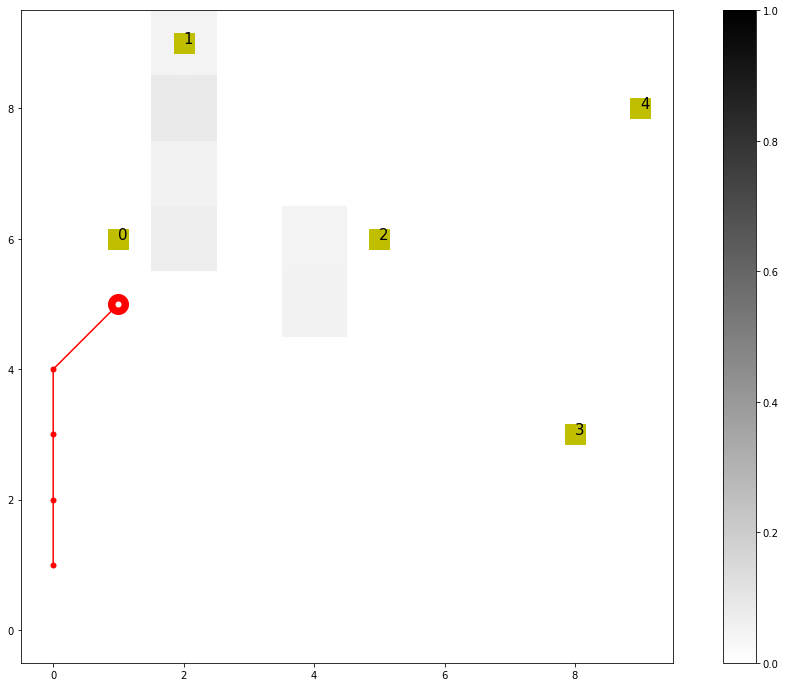

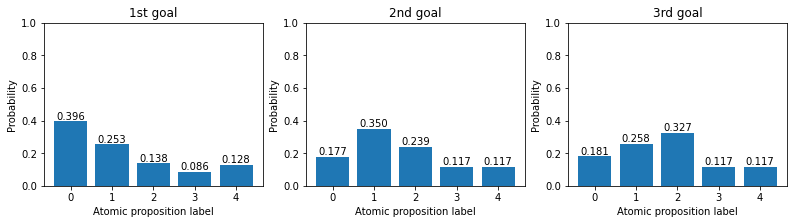

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="500.0px" height="500.0px" viewBox="0 0 500.0 500.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t5642e9c475174b57a764aaae5891e6a5"> idx: 0
dist: 1.0000
support: 0.0000
height: 0.0000
name: 42 1 idx: 1
dist: 1.0000
support: 0.0000
height: 0.0000
name: 38 2 idx: 2
dist: 1.0000
support: 0.0000
height: 2.0000
name: 5 4 idx: 3
dist: 1.0000
support: 0.0000
height: 2.0000
name: 3 2 idx: 4
dist: 1.0000
support: 0.0000
height: 2.0000
name: 2 1 idx: 5
dist: 1.0000
support: 0.0000
height: 1.0000
name: 8 2 idx: 6
dist: 1.0000
support: 0.0000
height: 1.0000
name: 7 1 idx: 7
dist: 1.0000
support: 0.0000
height: 2.0000
name: 1 0 (0, 2, 1): 0.1066 (0, 1, 2): 0.1898 (4,): 0.1278 (2,): 0.1376 (1,): 0.2533

time: 1.29 s


In [8]:
print("Regions: ", ws.region)
print("-------------------------------------------------------------------")
monitor = HIMO(LTL_formula, ws, alpha=1, beta_high=1, beta_low=1, epsilon=0.3, tree_depth=4)
monitor.add_observations([(0,1),(1,5)])
    
monitor.prediction(300, 5)
monitor.plot(tree_prob_threshold=0.1, tree_height=500, tree_width=500)

---